Project :- House Price Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('housing_price_dataset.csv')
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
df=data.copy()

In [4]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [5]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [6]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [7]:
df.isnull()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
49995,False,False,False,False,False,False
49996,False,False,False,False,False,False
49997,False,False,False,False,False,False
49998,False,False,False,False,False,False


In [8]:
df[df.isnull().any(axis=1)]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [9]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [10]:
data.columns     # check the columns of the dataset

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [11]:
data.describe()                     # describe the dataset

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [12]:
data.dtypes          # "dtypes" function provides the datatype of the dataset column-wise

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [13]:
data.shape            # it gives the shape of the dataset ( rows , columns )

(50000, 6)

Task - 2 :- Data Preprocessing

In [14]:
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [15]:
Encoding = pd.get_dummies(data,columns=["Neighborhood"])     
# Display the rows of the dataframe with the new encoded columns
Encoding 

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False
49996,2854,2,2,1988,374507.656727,False,True,False
49997,2979,5,3,1962,384110.555590,False,True,False
49998,2596,5,2,1984,380512.685957,True,False,False


In [16]:
df['Neighborhood'] = data['Neighborhood'].astype('category').cat.codes

# Display the rows of the dataframe with the encoded column
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [17]:
# Calculate the first (Q1) and third (Q3) quartiles of 'Price' for each neighborhood
Q1 = data.groupby('Neighborhood')['Price'].quantile(0.20)
Q2 = data.groupby('Neighborhood')['Price'].quantile(0.80)

# Calculate the IQR for each neighborhood
IQR = Q2 - Q1

# Display the IQR for each neighborhood
IQR

Neighborhood
Rural     135086.884953
Suburb    134396.308280
Urban     134966.067973
Name: Price, dtype: float64

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('housing_price_dataset.csv')

# One-hot encode the 'Neighborhood' column
df_encoded = pd.get_dummies(df, columns=['Neighborhood'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_encoded)

# Create a new DataFrame with the scaled data
df_standard_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

# Display the first 5 rows of the standard scaled dataframe
print("Data after Standard Scaling:")
df_standard_scaled

Data after Standard Scaling:


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.207861,0.449067,-1.220113,-0.791751,-0.124401,1.413620,-0.708836,-0.705082
1,0.786480,-0.446738,0.005614,-0.260842,-0.391551,1.413620,-0.708836,-0.705082
2,-0.254340,-1.342543,-1.220113,-0.743486,1.077785,-0.707404,1.410763,-0.705082
3,0.499777,-1.342543,-1.220113,0.511390,-0.236936,-0.707404,-0.708836,1.418275
4,0.214811,1.344872,0.005614,0.752713,0.625272,-0.707404,1.410763,-0.705082
...,...,...,...,...,...,...,...,...
49995,-1.258671,1.344872,1.231341,-0.502164,-1.638359,1.413620,-0.708836,-0.705082
49996,1.472831,-1.342543,0.005614,0.125274,1.965829,-0.707404,1.410763,-0.705082
49997,1.690031,1.344872,1.231341,-1.129602,2.091949,-0.707404,1.410763,-0.705082
49998,1.024531,1.344872,0.005614,-0.067784,2.044696,1.413620,-0.708836,-0.705082


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('housing_price_dataset.csv')

# One-hot encode the 'Neighborhood' column
df_encoded = pd.get_dummies(df, columns=['Neighborhood'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_encoded)

# Create a new DataFrame with the scaled data
df_minmax_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

# Display the first 5 rows of the min-max scaled dataframe
print("\nData after Min-Max Scaling:")
df_minmax_scaled


Data after Min-Max Scaling:


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.563282,0.666667,0.0,0.267606,0.476459,1.0,0.0,0.0
1,0.729865,0.333333,0.5,0.422535,0.437991,1.0,0.0,0.0
2,0.430215,0.000000,0.0,0.281690,0.649565,0.0,1.0,0.0
3,0.647324,0.000000,0.0,0.647887,0.460255,0.0,0.0,1.0
4,0.565283,1.000000,0.5,0.718310,0.584406,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.352113,0.258459,1.0,0.0,0.0
49996,0.927464,0.000000,0.5,0.535211,0.777437,0.0,1.0,0.0
49997,0.989995,1.000000,1.0,0.169014,0.795597,0.0,1.0,0.0
49998,0.798399,1.000000,0.5,0.478873,0.788793,1.0,0.0,0.0


Task - 3 :- Exploratory Data Analysis (EDA)

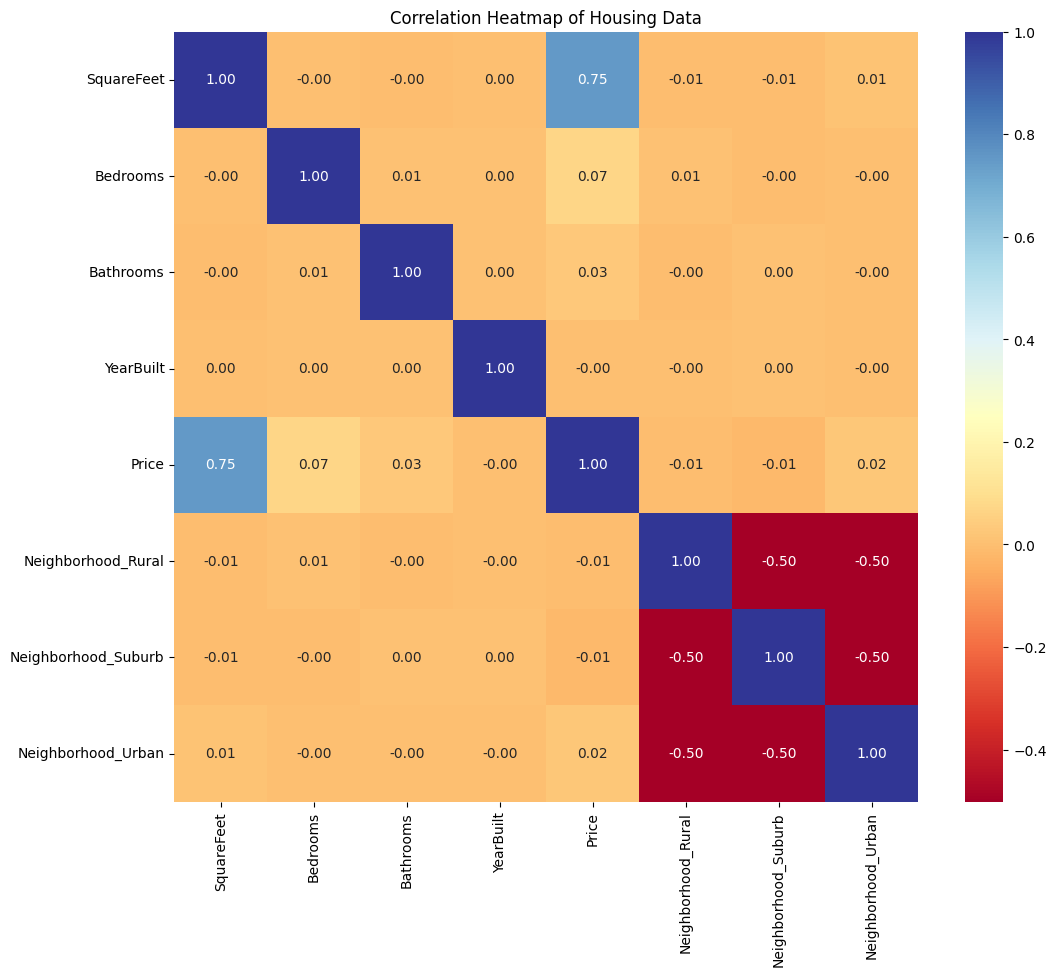

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('housing_price_dataset.csv')

# --- Preprocessing for Correlation ---
# To include the 'Neighborhood' in our correlation matrix, we need to convert it
# from text to numbers. One-hot encoding is a great way to do this without
# creating a false sense of order (e.g., Suburb isn't "greater" than Rural).
df_encoded = pd.get_dummies(df, columns=['Neighborhood'])

# --- Correlation Calculation & Visualization ---
# Calculate the correlation matrix for the entire dataset
correlation_matrix = df_encoded.corr()

# Set up the plot size for better readability
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

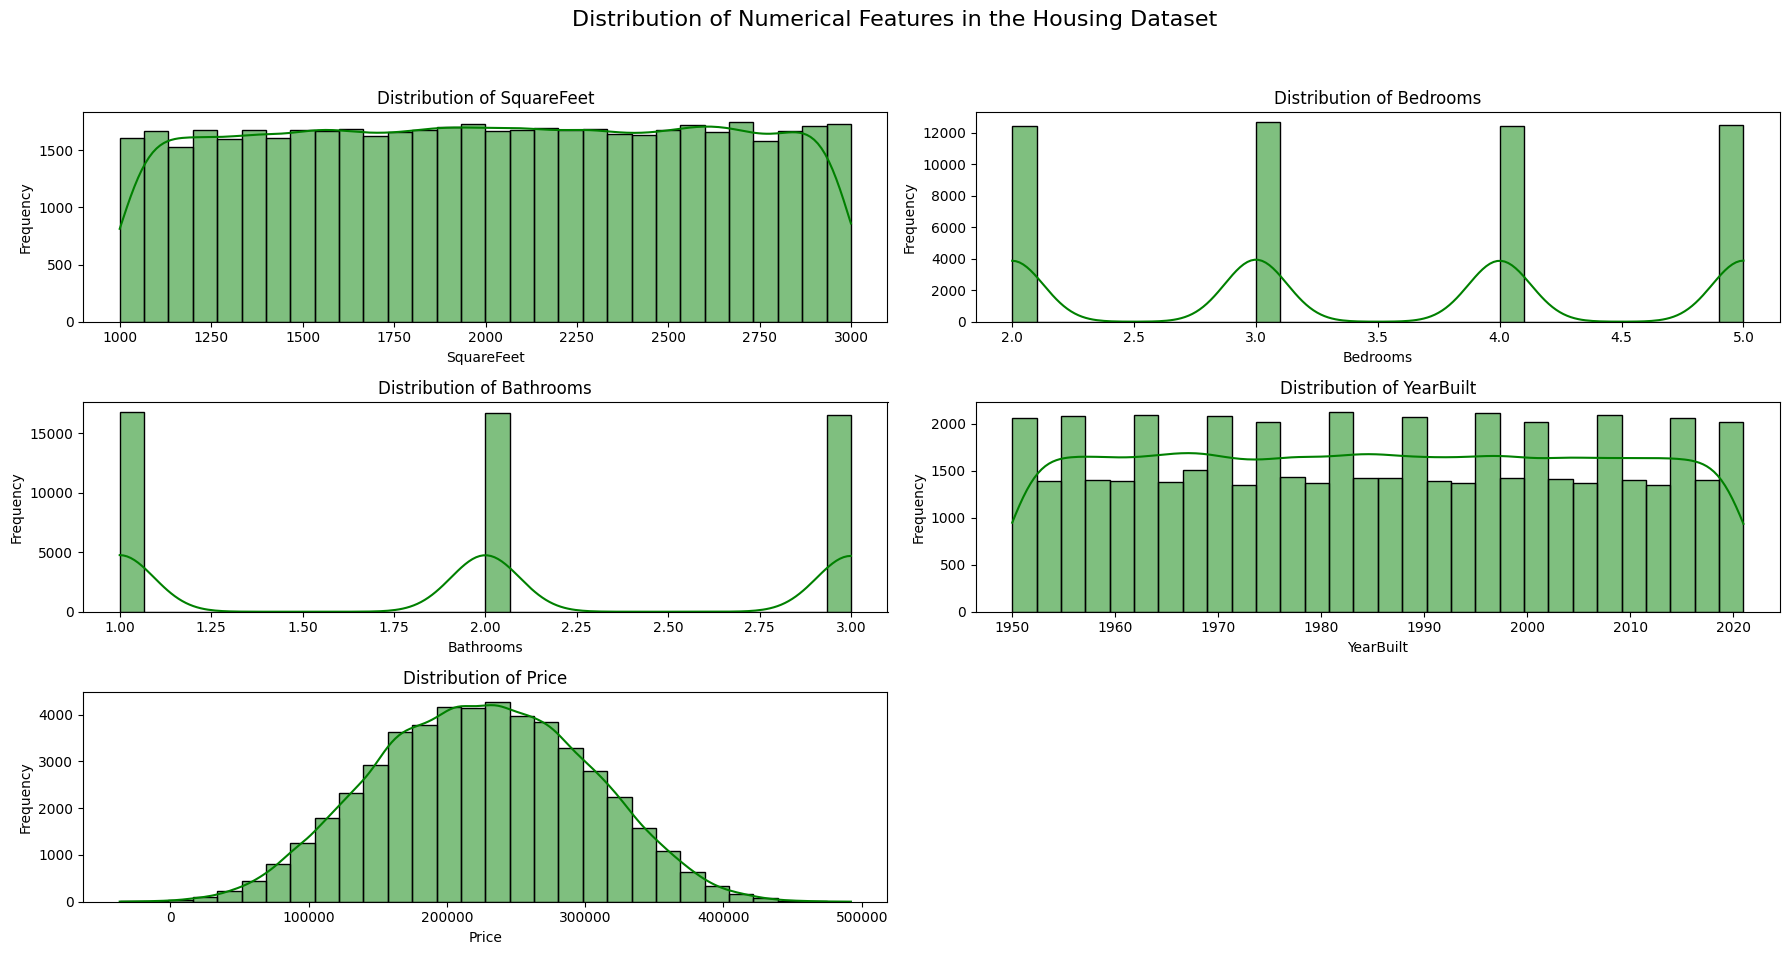

In [21]:


# Select numerical columns for plotting
numerical_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

# --- Create Distribution Plots ---
# Set up the plotting area (2 rows, 3 columns of subplots)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features in the Housing Dataset', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a histogram and KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30,color="green")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

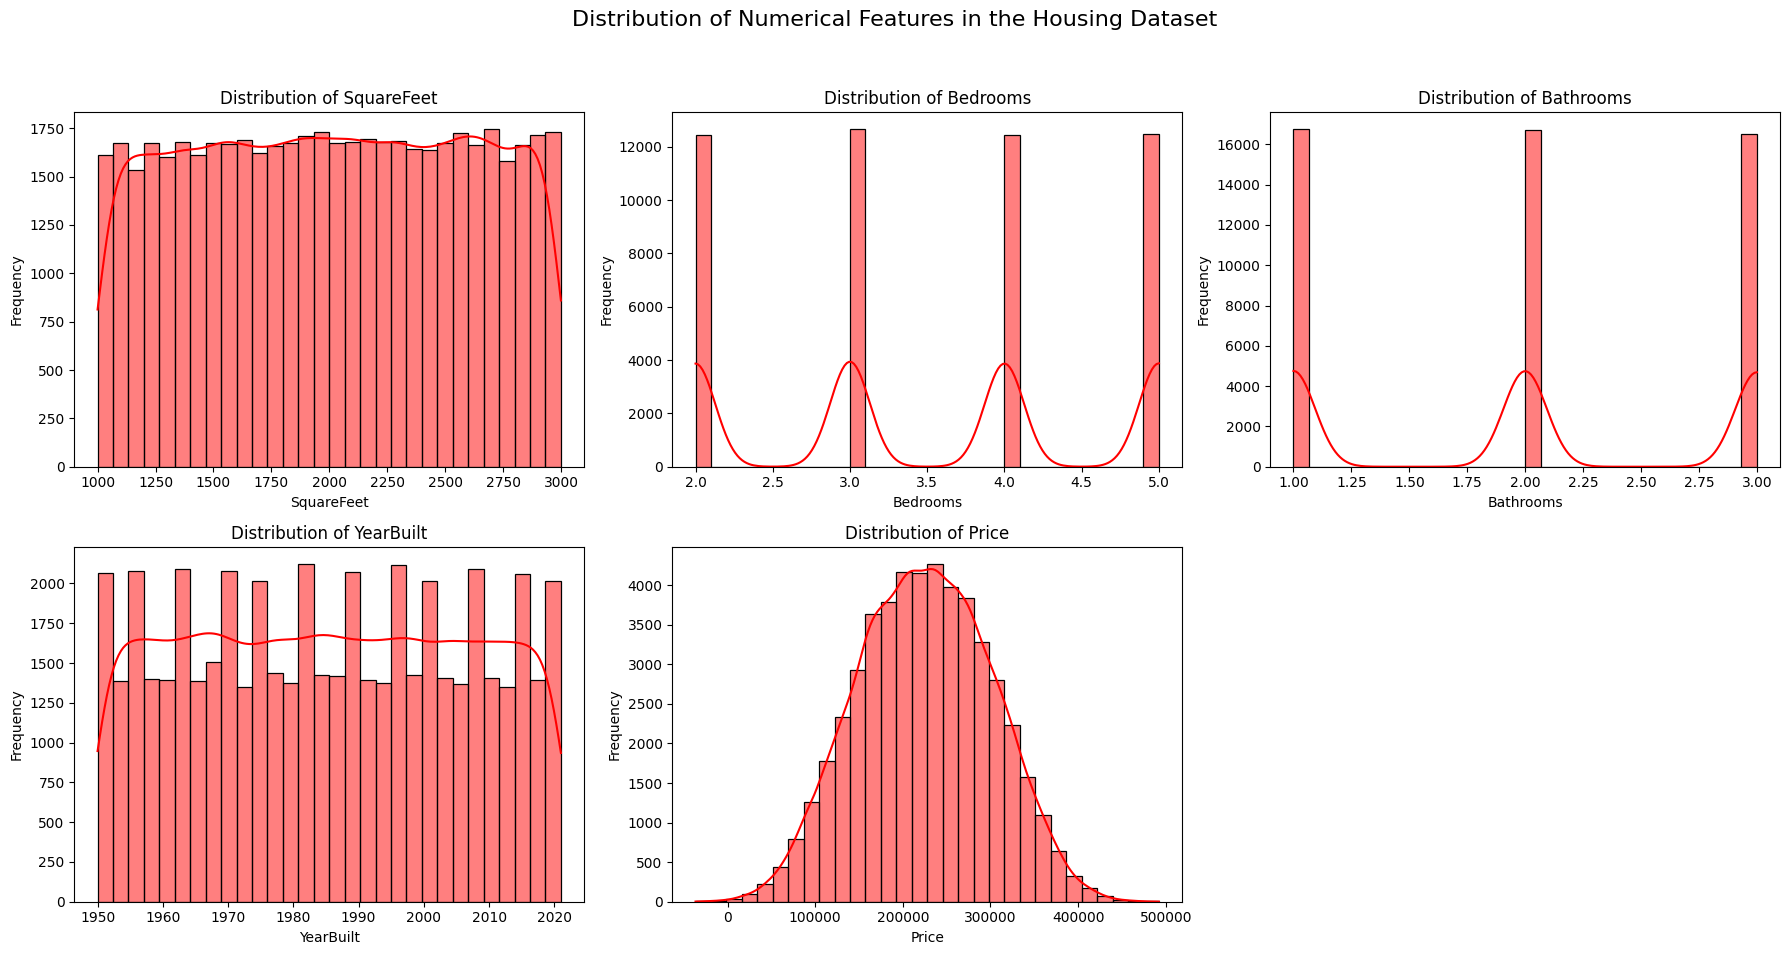

In [22]:


# Select the numerical columns you want to plot
numerical_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features in the Housing Dataset', fontsize=16)

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, col in enumerate(numerical_columns):
    # --- This is the line that's changed ---
    # Add the color='red' argument to change the plot color
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color="red")

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# This loop will hide any empty subplots if you have an odd number of plots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [23]:
import pandas as pd
import numpy as np
import io

# 1. Load the Data
# Correctly loads the data from the uploaded file
df = pd.read_csv("housing_price_dataset.csv")


print(f"Original dataset shape: {df.shape}")

# 2. Identify and Remove Outliers using the IQR method
# We'll focus on the 'Price' and 'SquareFeet' columns
columns_to_check = ['Price', 'SquareFeet']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a condition to identify outliers
    condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Count the outliers for the current column
    num_outliers = df[condition].shape[0]
    print(f"Number of outliers detected in '{column}': {num_outliers}")

# Create a boolean mask to keep rows that are NOT outliers in ANY of the specified columns
# We start with a mask of all True values
mask = np.full(df.shape[0], True)

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update the mask to be False for any row that is an outlier in the current column
    mask &= ~((df[column] < lower_bound) | (df[column] > upper_bound))

# Apply the combined mask to filter the DataFrame
df_no_outliers = df[mask]

# --- 3. Print the Results ---
print("\n--- Outlier Removal Complete ---")
print(f"Original dataset shape: {df.shape}")
print(f"New dataset shape after removing outliers: {df_no_outliers.shape}")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")

# You can now use 'df_no_outliers' for training your models
# For example:
# X = df_no_outliers.drop('Price', axis=1)
# y = df_no_outliers['Price']

Original dataset shape: (50000, 6)
Number of outliers detected in 'Price': 59
Number of outliers detected in 'SquareFeet': 0

--- Outlier Removal Complete ---
Original dataset shape: (50000, 6)
New dataset shape after removing outliers: (49941, 6)
Number of rows removed: 59


In [24]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [25]:
df["Price"].isnull().sum()

0

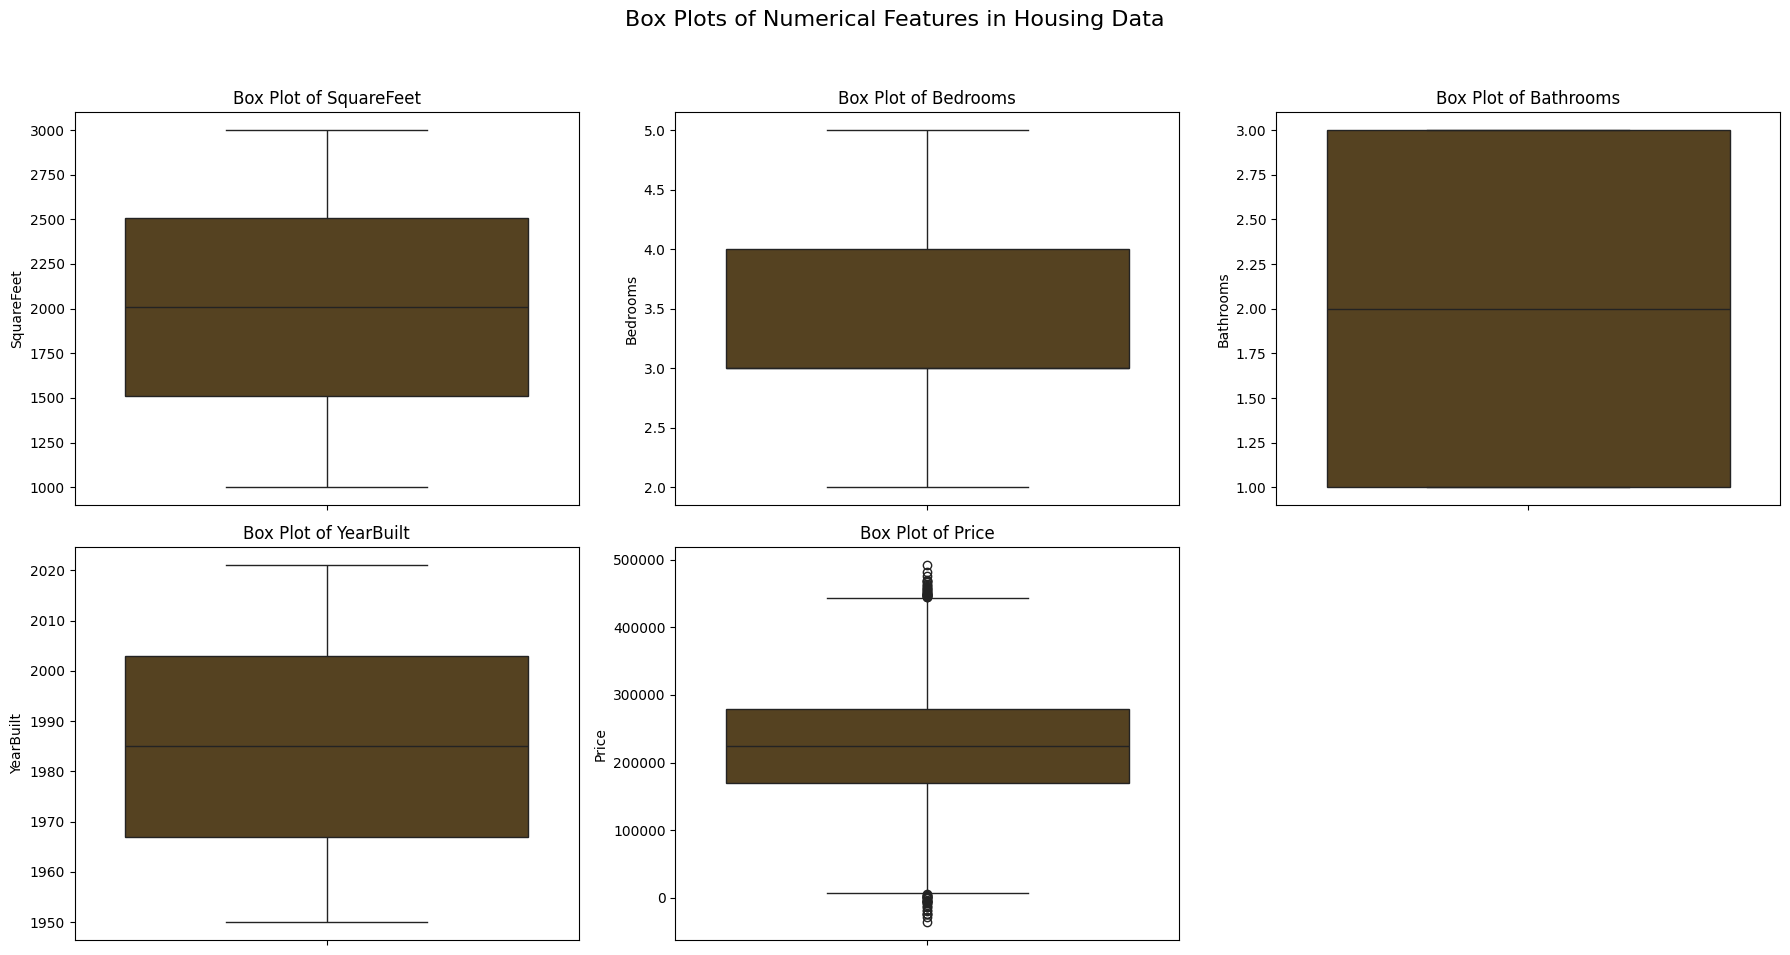

In [26]:
# Safe box-plot rendering: validate columns and handle NaNs/missing columns
try:
    numerical_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

    # Check that df exists and has the required columns
    if 'df' not in globals():
        raise NameError('DataFrame `df` is not defined. Make sure you loaded the CSV into `df` before this cell.')

    missing_cols = [c for c in numerical_columns if c not in df.columns]
    if missing_cols:
        print(f'Missing columns for box plots: {missing_cols}')
    else:
        # Use a copy with NaNs dropped for the plotted columns only
        plot_df = df[numerical_columns].dropna()
        if plot_df.empty:
            print('After dropping NaNs, no data remains for the selected numerical columns.')
        else:
            # Set up the plotting area with subplots (2 rows, 3 columns)
            fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
            fig.suptitle('Box Plots of Numerical Features in Housing Data', fontsize=16)
            axes = axes.flatten()

            for i, col in enumerate(numerical_columns):
                sns.boxplot(y=plot_df[col], ax=axes[i], color="#5E4418")
                axes[i].set_title(f'Box Plot of {col}')
                axes[i].set_ylabel(col)

            # Hide any extra axes
            for j in range(len(numerical_columns), len(axes)):
                fig.delaxes(axes[j])

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

except Exception as e:
    import traceback
    print('Error while creating box plots:')
    traceback.print_exc()

In [27]:
df['Price'].unique().mean()

224827.32515099045

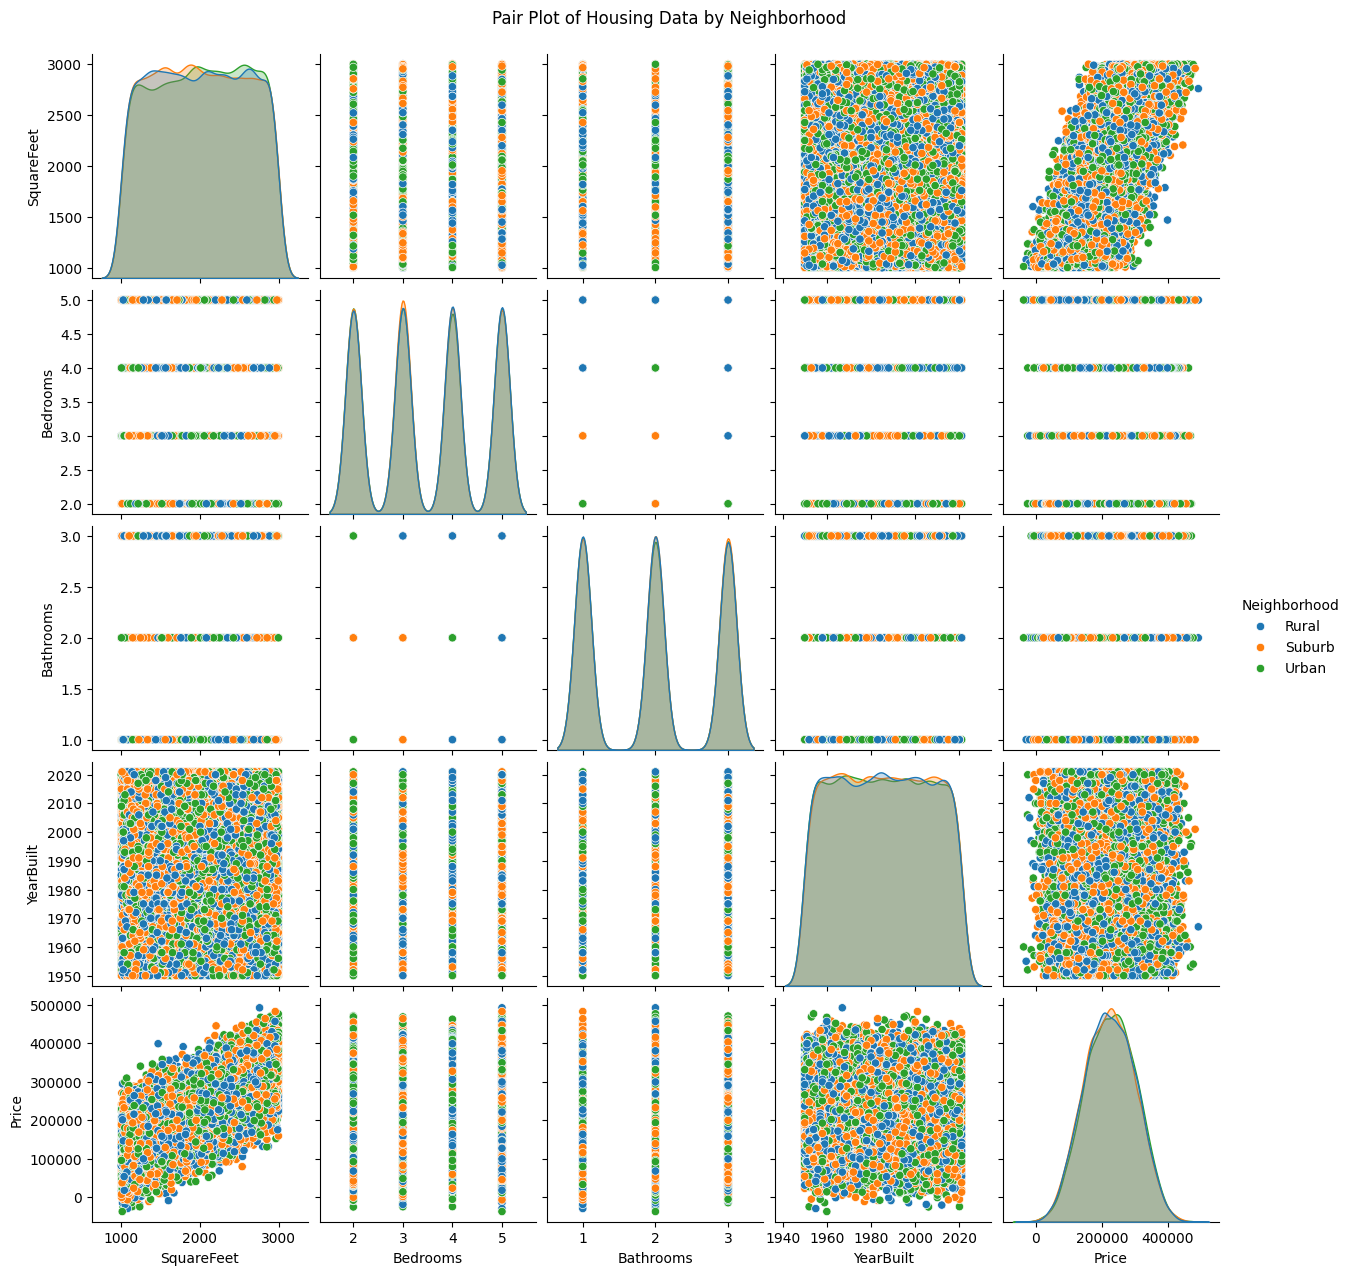

In [28]:


# --- Generate the Pair Plot ---
# This single line of code creates a grid of plots to show the relationship
# between each pair of numerical variables.
# The 'hue' parameter adds a categorical dimension by coloring the points
# based on the 'Neighborhood' column.
sns.pairplot(data, hue='Neighborhood', diag_kind='auto')

# Add a title for the entire plot
plt.suptitle('Pair Plot of Housing Data by Neighborhood', y=1.02) # y=1.02 raises title

# Display the plot
plt.show()

C:\Users\panch\AppData\Local\Temp\ipykernel_6396\873051369.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Neighborhood', y='Price', ax=axes[4],palette=["#05B4FF","#BCFF05","#DB8428"])


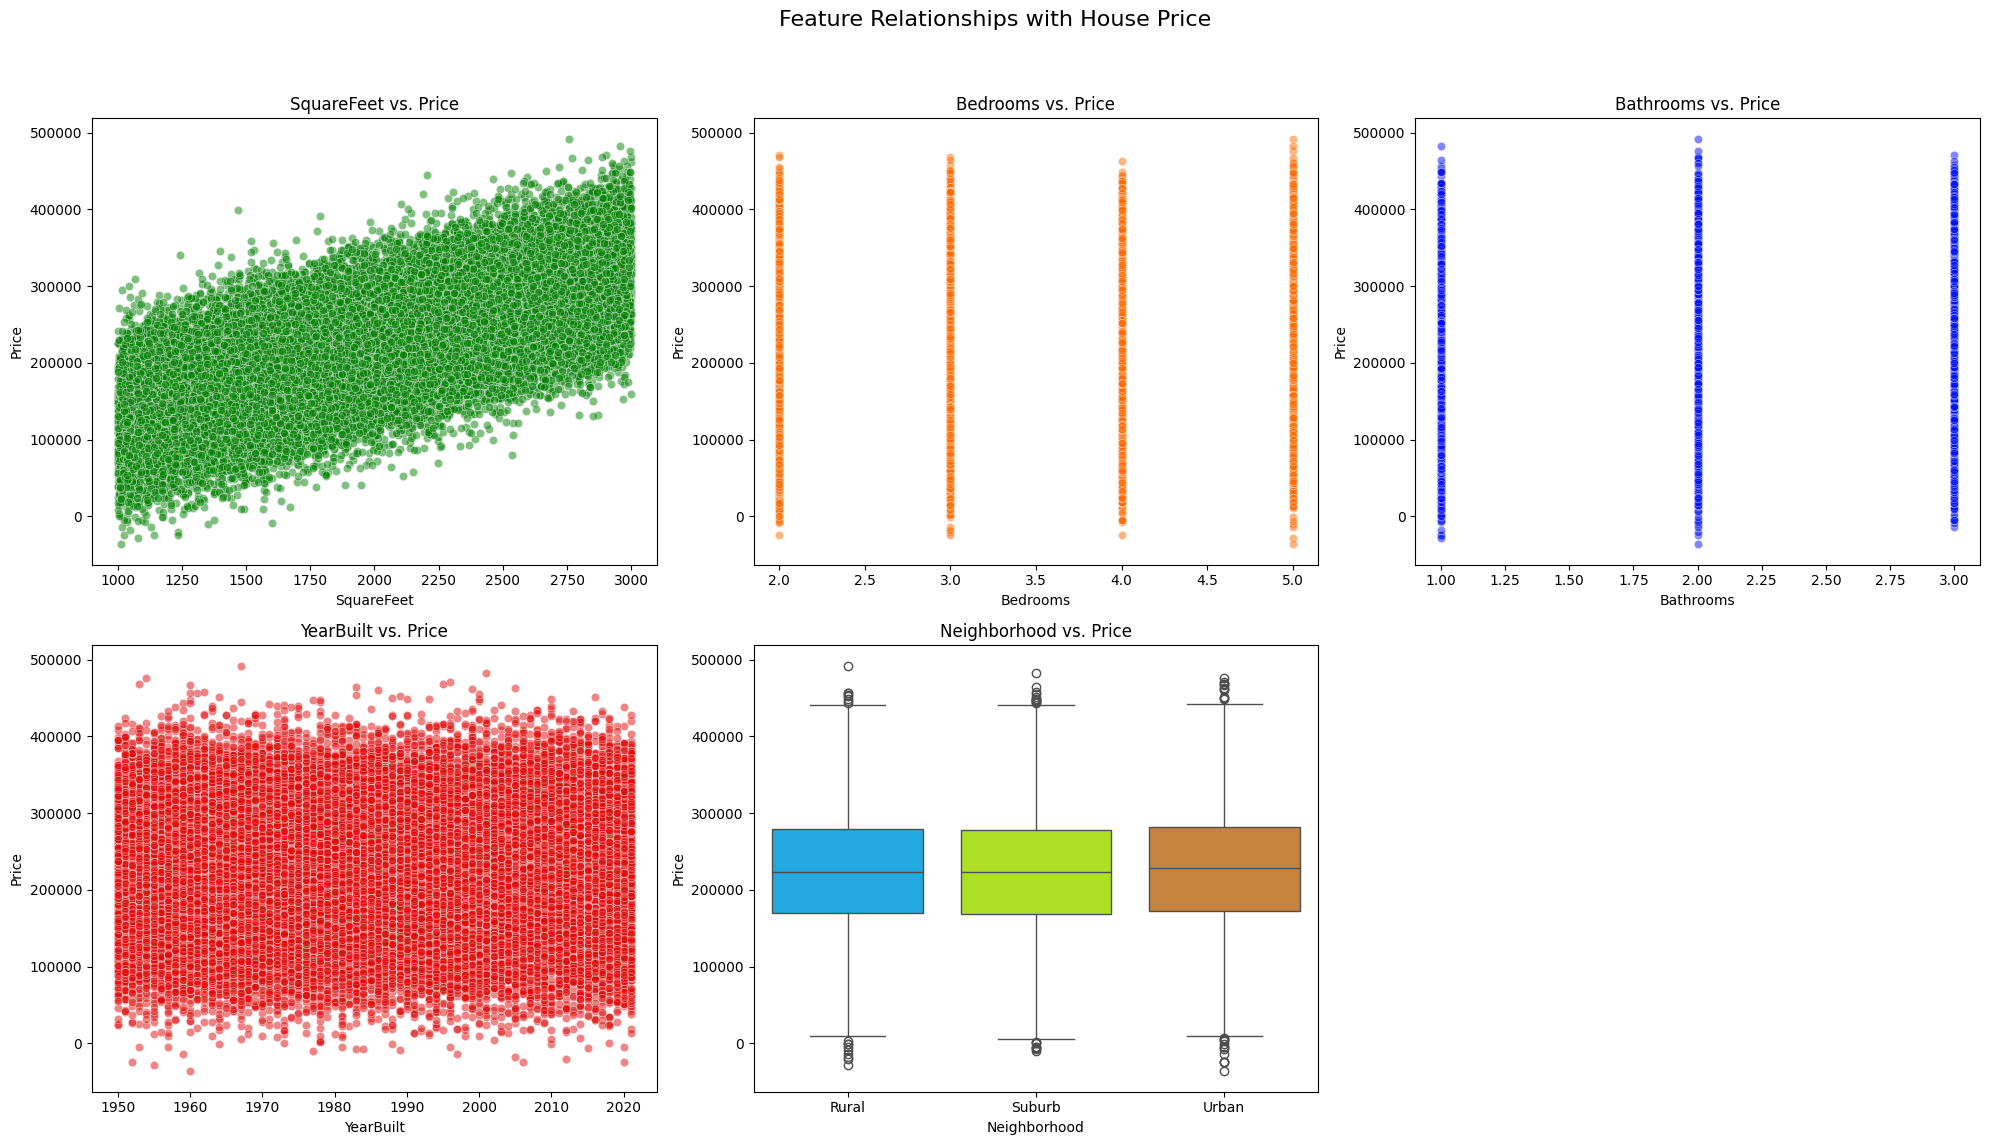

In [29]:


# --- Visualize Feature Relationships with Price ---

# Set up the plotting area (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Feature Relationships with House Price', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# 1. Scatter plot for SquareFeet vs. Price
sns.scatterplot(data=df, x='SquareFeet', y='Price', ax=axes[0], alpha=0.5,color="green")
axes[0].set_title('SquareFeet vs. Price')

# 2. Scatter plot for Bedrooms vs. Price
sns.scatterplot(data=df, x='Bedrooms', y='Price', ax=axes[1], alpha=0.5,color="#FF6A00")
axes[1].set_title('Bedrooms vs. Price')

# 3. Scatter plot for Bathrooms vs. Price
sns.scatterplot(data=df, x='Bathrooms', y='Price', ax=axes[2], alpha=0.5,color="#0010F6")
axes[2].set_title('Bathrooms vs. Price')

# 4. Scatter plot for YearBuilt vs. Price
sns.scatterplot(data=df, x='YearBuilt', y='Price', ax=axes[3], alpha=0.5,color="#E20B0B")
axes[3].set_title('YearBuilt vs. Price')

# 5. Box plot for Neighborhood vs. Price
sns.boxplot(data=df, x='Neighborhood', y='Price', ax=axes[4],palette=["#05B4FF","#BCFF05","#DB8428"])
axes[4].set_title('Neighborhood vs. Price')

# Hide the last unused subplot
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

# Model Training

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.3438
Confusion Matrix:
 [[ 390 1567 1385]
 [ 412 1564 1381]
 [ 347 1470 1484]]
